In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
import json

#set the path to the raw tweets file
tweets_data_path = '/Users/AudreyChen/Desktop/twitter_xmasmovies.txt'

#initialize an array and open the raw tweets file for reading
tweets_data = []
tweets_file = open(tweets_data_path, "r")

#process each line in raw tweets file
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
#print how many tweets were processed
print (len(tweets_data))

110359


In [13]:
tweets = pd.DataFrame()

In [14]:
tweets['text'] =  [tweet.get('text','') for tweet in tweets_data]

# Top URLs

In [20]:
url_list = {}
fh = open(tweets_data_path,'r')

for line in fh:
    try:
        tweet = json.loads(line)
    except:
        continue       
    if 'text' not in tweet:
        continue
    urls = tweet['entities']['urls']
    for url in urls:
        h = url['expanded_url']
        url_list[h] = 1 + url_list.get(h,0)

In [23]:
topUrls = sorted(url_list.items() , reverse=True, key=lambda x: x[1])
topUrls[0:10]

[('https://twitter.com/JoeBrunoWSOC9/status/1070014297923833857', 497),
 ('https://twitter.com/goin_q/status/1069044851734388736?s=21', 449),
 ('https://twitter.com/afajinmi_/status/1071044116329521152', 334),
 ('https://twitter.com/allie_poehling/status/1071298346545897473', 200),
 ('https://MasonRamsey.lnk.to/WhiteChristmasVideoTA', 196),
 ('https://twitter.com/hansreloaded/status/1069525623985618944', 168),
 ('https://twitter.com/sgrate_/status/1070142161998483457', 114),
 ('https://t.me/joinchat/AAAAAEgUsPT0f9za-qHJuw', 102),
 ('https://twitter.com/dominiqtrix/status/1069829494863618048', 99),
 ('https://jli.st/Christmas2018A', 97)]

# Top hashtags

In [3]:
hashtag_list = {}
fh = open(tweets_data_path,'r')
# loop over lines in file
for line in fh:
    # load json data
    try:
        tweet = json.loads(line)
    except:
        continue       
    if 'text' not in tweet:
        continue
    # extract hashtags entities    
    hts = tweet['entities']['hashtags']
    for hinfo in hts:
        h = hinfo['text']
        # add hashtag to list
        hashtag_list[h] = 1 + hashtag_list.get(h,0)

In [4]:
listofTuples = sorted(hashtag_list.items() , reverse=True, key=lambda x: x[1])
pd.DataFrame(listofTuples[0:10])

,0,1
0,12DaysofFunko,1968
1,Christmas,722
2,ELF,508
3,SuperJunior,504
4,SUPERJUNIOR,387
5,elf,344
6,UnCampeónNoSeHaceSolo,286
7,christmas,266
8,Elf,227
9,슈퍼주니어,220


In [ ]:
# SJ's fandom name is E.L.F, which stands for Ever Lasting Friends.

# Top users

In [5]:
users = pd.DataFrame()
users['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_data))
users['id'] = list(map(lambda tweet: tweet['user']['id'], tweets_data))
users['name'] = list(map(lambda tweet: tweet['user']['name'], tweets_data))

In [93]:
users.sort_values("followers_count", axis=0, ascending=False, inplace=True)

In [94]:
users.drop_duplicates(subset ="id",keep = False, inplace = True)

In [95]:
users.head(10)

,followers_count,id,name
33433,40867329,759251,CNN
75915,24624832,822215679726100480,President Trump
62940,12246915,23690344,Kelly Clarkson
33432,8073427,2097571,CNN International
54877,4221445,7144422,Lifehacker
6425,3595098,19362299,NFL Network
86961,3576454,27844479,British Vogue
63944,3326221,40519997,Chad Johnson
76326,3127436,355741893,Men's Humor
61190,2557679,16343974,The Telegraph


# Top retweets

In [6]:
retweets = {}
fh = open(tweets_data_path, 'r')
for line in fh:
    try:
        retweet = json.loads(line)
    except:
        continue
    if 'retweeted_status' not in retweet:
        continue
    rt = retweet['retweeted_status']
    if rt['retweet_count'] < 1000:
        continue
    retweets[rt['id_str']] = rt
    # convert to list
retweets = [retweets[w] for w in retweets.keys()]
retweets.sort(key=lambda x: -x['retweet_count'])

In [9]:
for t in retweets[:15]:
    print ('['+ t['user']['screen_name'] + ']: ' + t['text'] + \
    ' [' + str(t['retweet_count']) + ' retweets]'+'\n')

[DlSRESPECT]: i actually love this metaphor because it’s a fake target and you’ve put it there yourself. https://t.co/qF6p93RiUF [158838 retweets]

[ZajiaNadal]: We got a white mugshot. A black man smiling AND a murder indictment?! BITCH Christmas came early this year https://t.co/j9WaCwZWjE [68055 retweets]

[sydney_len]: Call ur boyfriend papa elf instead of daddy to truly get in the Christmas spirit [56392 retweets]

[DisorderSad]: Social anxiety isn’t “omg I hate everyone i wish I was watching Netflix in my room” it’s “I want desperately to be… https://t.co/0jx3Gb0kKO [48853 retweets]

[nickhansonMN]: i always say "you're annoying" or "i hate you" to the people i actually like, you just gotta understand my love [47195 retweets]

[Ashton5SOS]: And I love you all, and one day I'll look back and say wow, we actually made it out of the garage, and it's all because of you [46594 retweets]

[alezander]: what if no one actually falls in love with me https://t.co/s20zslYqGX [42525 retweets

# Top sig. words

In [10]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import PorterStemmer

def tweet_tokenizer(verbatim):
    try:
        tokenizer = TweetTokenizer()
        all_tokens = tokenizer.tokenize(verbatim.lower())
        # this line filters out all tokens that are entirely non-alphabetic characters
        filtered_tokens = [t for t in all_tokens if t.islower()]
        # filter out all tokens that are <=2 chars
        filtered_tokens = [x for x in filtered_tokens if len(x)>2]
    except IndexError:
        filtered_tokens = []
    return(filtered_tokens)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def get_frequent_terms(text_series, stop_words = None, ngram_range = (1,2)):
    count_vectorizer = CountVectorizer(analyzer = "word",
                                       tokenizer = tweet_tokenizer,
                                       stop_words = stop_words, 
                                       ngram_range = ngram_range 
                                      )
    term_freq_matrix = count_vectorizer.fit_transform(text_series)
    terms = count_vectorizer.get_feature_names()
    term_frequencies = term_freq_matrix.sum(axis = 0).tolist()[0]

    term_freq_df = (pd.DataFrame(list(zip(terms, term_frequencies)), columns = ["token","count"])
                    .set_index("token")
                    .sort_values("count",ascending = False))
    return term_freq_df

In [15]:
term_freq_df = get_frequent_terms(tweets["text"],stop_words = "english") 

In [16]:
term_freq_df.head(10)

,count
token,
christmas,29999
elf,27871
love,19288
actually,17346
home,9328
white,8256
like,6429
santa,5611
just,5326


# WordCloud

In [3]:
tweets = pd.DataFrame()
tweets['text'] =  [tweet.get('text','') for tweet in tweets_data]
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

tweets['tidy_tweet'] = tweets['text'].str.replace("[^a-zA-Z#]", " ")
tweets['tidy_tweet'] = tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = tweets['tidy_tweet'].apply(lambda x: x.split())
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
#tokenized_tweet.head()

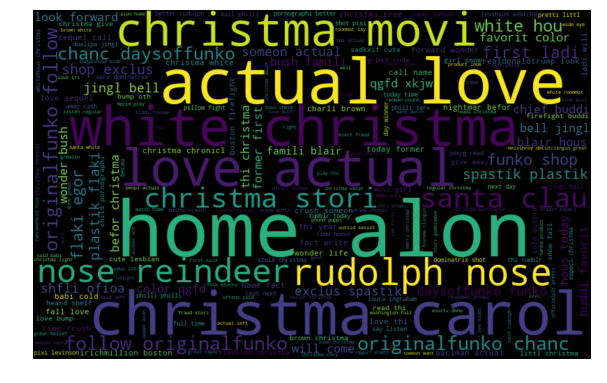

In [4]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets['tidy_tweet'] = tokenized_tweet

all_words = ' '.join([text for text in tweets['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()